# Explore the data



In [46]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [47]:
# Load the dataset
data = pd.read_csv('mcdonalds.csv')

# Print first few rows and the name of columns in dataset
print(data.head())
print(" ")
print("Columns: ", data.columns.tolist())


  yummy convenient spicy fattening greasy fast cheap tasty expensive healthy  \
0    No        Yes    No       Yes     No  Yes   Yes    No       Yes      No   
1   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes       Yes      No   
2    No        Yes   Yes       Yes    Yes  Yes    No   Yes       Yes     Yes   
3   Yes        Yes    No       Yes    Yes  Yes   Yes   Yes        No      No   
4    No        Yes    No       Yes    Yes  Yes   Yes    No        No     Yes   

  disgusting Like  Age      VisitFrequency  Gender  
0         No   -3   61  Every three months  Female  
1         No   +2   51  Every three months  Female  
2         No   +1   62  Every three months  Female  
3        Yes   +4   69         Once a week  Female  
4         No   +2   49        Once a month    Male  
 
Columns:  ['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap', 'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age', 'VisitFrequency', 'Gender']


In [48]:
# Segmentation variables: Extracting first 5 columns for analysis
dataframe = data.iloc[:, :5]

# Check for missing values and dataset info
print("Missing values per column:\n", dataframe.isnull().sum())
dataframe.info()

Missing values per column:
 yummy         0
convenient    0
spicy         0
fattening     0
greasy        0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   yummy       1453 non-null   object
 1   convenient  1453 non-null   object
 2   spicy       1453 non-null   object
 3   fattening   1453 non-null   object
 4   greasy      1453 non-null   object
dtypes: object(5)
memory usage: 56.9+ KB


In [49]:
# Converting "Yes"/"No" to 1/0
mapping = {"Yes": 1, "No": 0}
dataframe = dataframe.applymap(lambda x: mapping.get(x, x))
# Calculate and display means of numeric columns
mean = dataframe.mean().round(2)
print("Column Means:\n", mean)

Column Means:
 yummy         0.55
convenient    0.91
spicy         0.09
fattening     0.87
greasy        0.53
dtype: float64


<ipython-input-49-ca341ed25ee3>:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dataframe = dataframe.applymap(lambda x: mapping.get(x, x))


In [50]:
dataframe.corr()

,yummy,convenient,spicy,fattening,greasy
yummy,1.000000,0.253807,0.008742,-0.087027,-0.151853
convenient,0.253807,1.000000,0.028928,0.036451,-0.106948
spicy,0.008742,0.028928,1.000000,-0.041322,0.053932
fattening,-0.087027,0.036451,-0.041322,1.000000,0.319283
greasy,-0.151853,-0.106948,0.053932,0.319283,1.000000


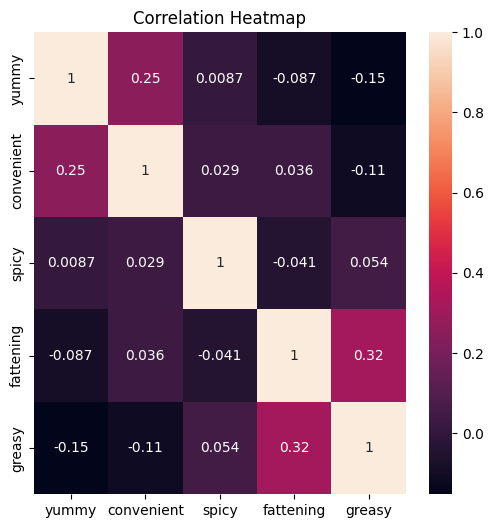

In [51]:
# Import the seaborn library
import seaborn as sns

# Correlation Heatmap
plt.figure(figsize = (6,6))
sns.heatmap(dataframe.corr(), annot = True) # Now sns is defined and can be used
plt.title("Correlation Heatmap")
plt.show()

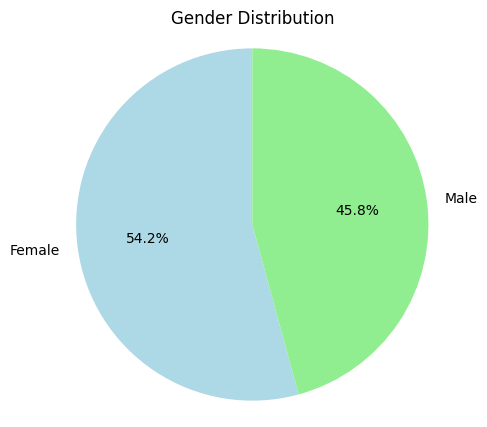

In [52]:
# Pie Chart for Gender Distribution
gender_count = data["Gender"].value_counts()
plt.figure(figsize = (5,5))
plt.pie(gender_count, labels = gender_count.index, colors = ["lightblue", "lightgreen"], autopct = "%1.1f%%", startangle=90)
plt.title("Gender Distribution")
plt.axis("equal")
plt.show()

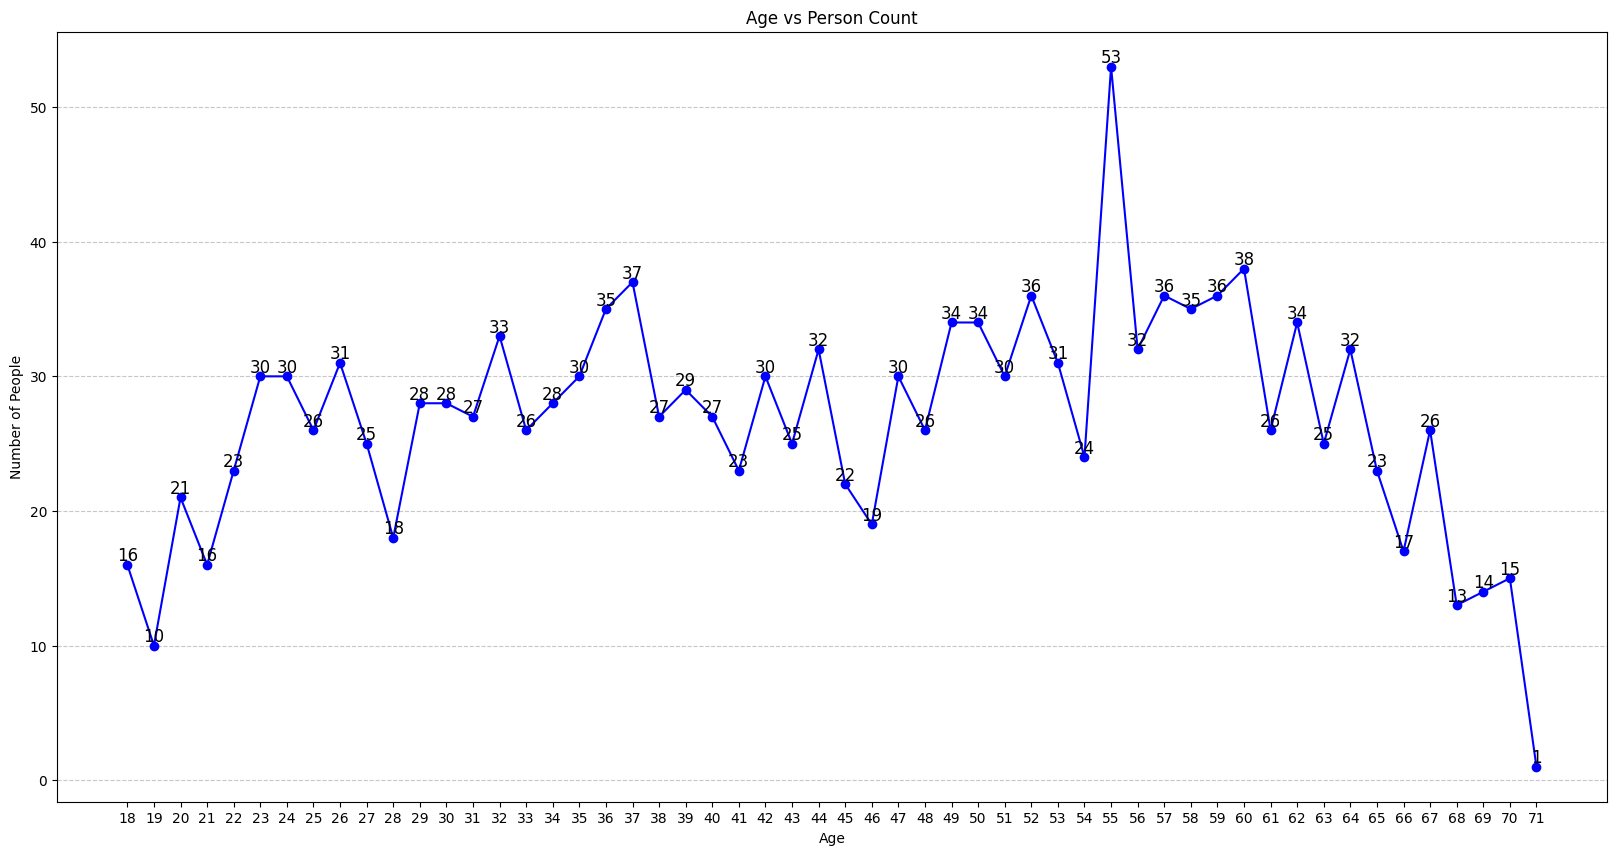

In [53]:
# Age v/s Person count line graph with point labels
age_count = data["Age"].value_counts().sort_index()
plt.figure(figsize = (20,10))
plt.plot(age_count.index, age_count.values, color = "blue", marker = "o")

# Adding labels to the markers
for x, y in zip(age_count.index, age_count.values):
    plt.text(x, y, str(y), fontsize=12, ha='center', va='bottom')

plt.xlabel('Age')
plt.ylabel('Number of People')
plt.title('Age vs Person Count')
plt.xticks(age_count.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [54]:
# PCA Analysis
md = (data.iloc[:, :11] == 'Yes').astype(int)
pca = PCA()
md_pca = pca.fit_transform(md)

In [55]:
# Explained Variance
variance = pca.explained_variance_ratio_.round(2)
print("Explained Variance: ", variance)

Explained Variance:  [0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]


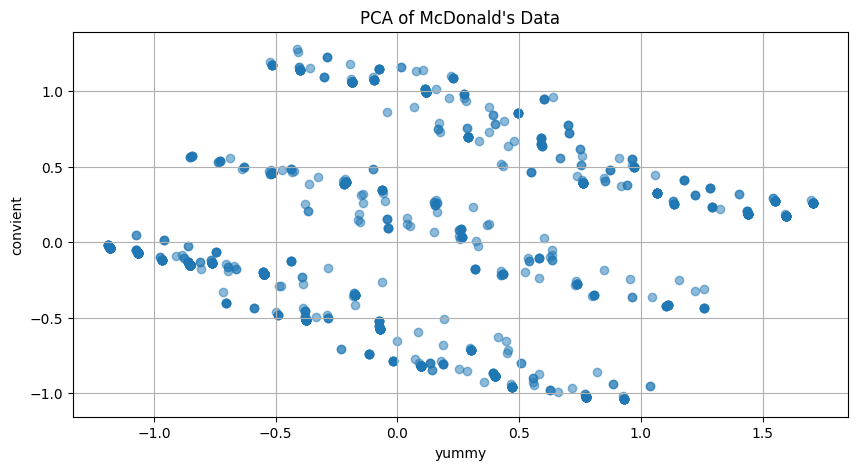

In [56]:
# PCA Scatter plot
plt.figure(figsize = (10,5))
plt.scatter(md_pca[:, 0], md_pca[:, 1], alpha = 0.5)
plt.title("PCA of McDonald's Data")
plt.xlabel("yummy")
plt.ylabel("convient")
plt.grid()
plt.show()

Explained Variance Ratio: [0.3  0.19 0.13 0.08 0.06 0.05 0.04 0.04 0.04 0.03 0.03]


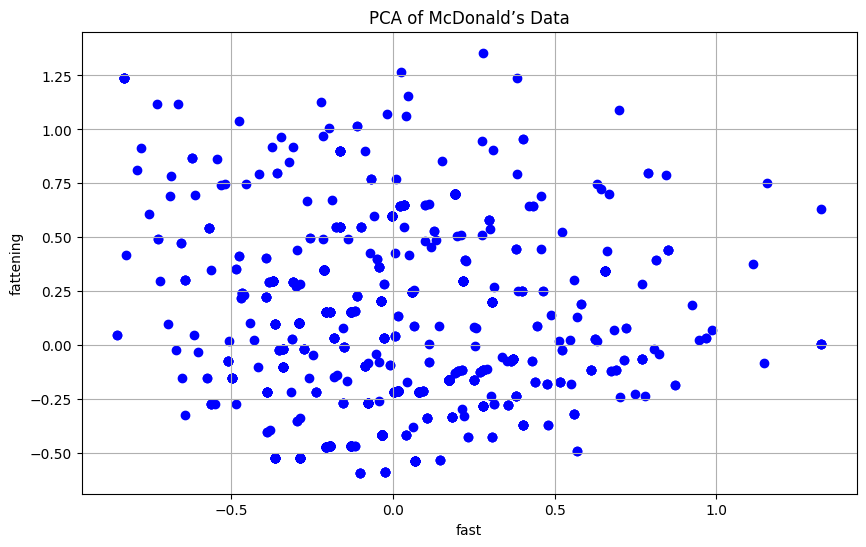

In [57]:
# PCA Analysis
md = (data.iloc[:, :11] == "Yes").astype(int)
pca = PCA()
md_pca = pca.fit_transform(md)

# Explained variance
variance = pca.explained_variance_ratio_.round(2)
print("Explained Variance Ratio:", variance)

# PCA scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(md_pca[:, 5], md_pca[:, 3], color='blue')
plt.title('PCA of McDonald’s Data')
plt.xlabel('fast')
plt.ylabel('fattening')
plt.grid()
plt.show()

# Extracting Segments using K-Means

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

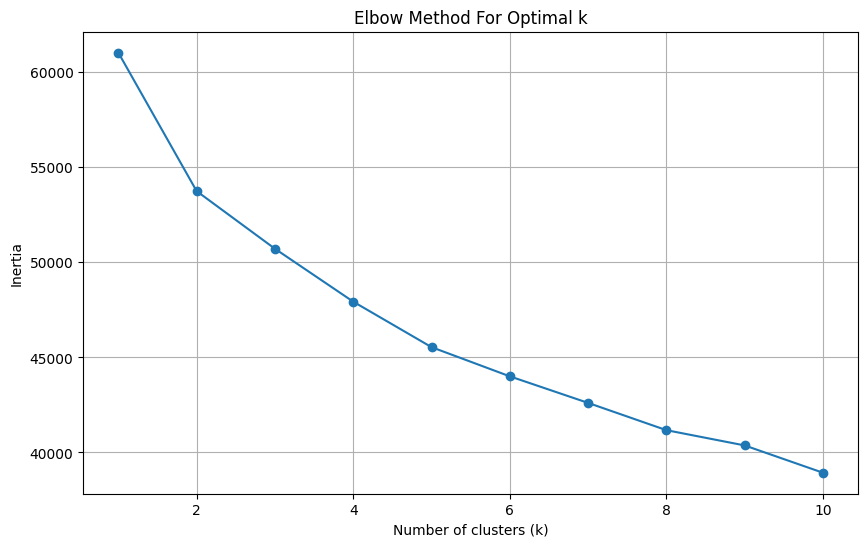

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


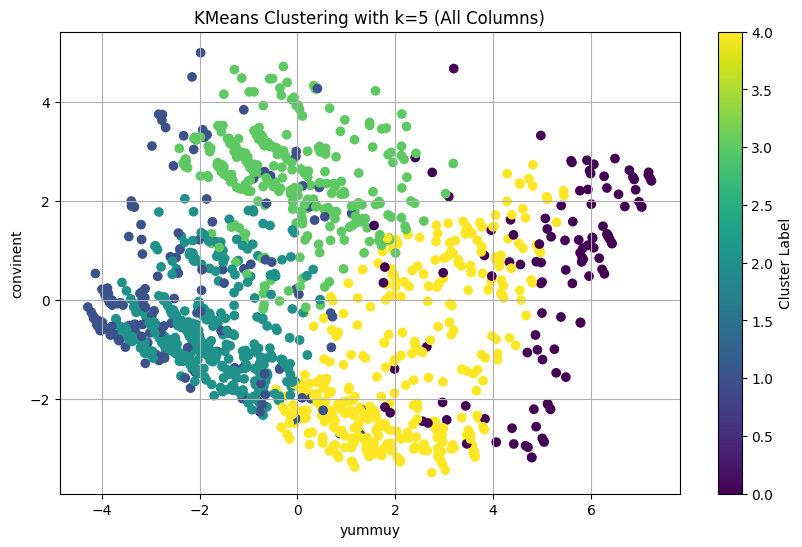

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# Assume all columns in the dataset are relevant
# Extract all columns
md = data

# Identify categorical columns
categorical_cols = md.select_dtypes(include=['object']).columns.tolist()

# Create a pipeline for preprocessing (One-hot encoding for categorical and scaling for all)
preprocessor = Pipeline(steps=[
    ('onehot', ColumnTransformer([('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')),
    ('scaler', StandardScaler())
])

# Fit and transform the data for all columns
md_preprocessed = preprocessor.fit_transform(md)

# Elbow method to find optimal k
inertia = [KMeans(n_clusters=k, random_state=1234).fit(md_preprocessed).inertia_ for k in range(1, 11)]

# Plot Elbow Graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid()
plt.show()

# KMeans clustering with k=5 (as an example)
kmeans = KMeans(n_clusters=5, random_state=1234)
labels = kmeans.fit_predict(md_preprocessed)

# PCA for 2D visualization (reduce to 2 principal components)
md_pca = PCA(n_components=2).fit_transform(md_preprocessed)

# Plot Clusters in 2D space
plt.figure(figsize=(10, 6))
plt.scatter(md_pca[:, 0], md_pca[:, 1], c=labels, cmap='viridis', marker='o')
plt.title('KMeans Clustering with k=5 (All Columns)')
plt.xlabel('yummuy')
plt.ylabel('convinent')
plt.colorbar(label='Cluster Label')
plt.grid()
plt.show()


# Extracting segments using mixtures of distribution

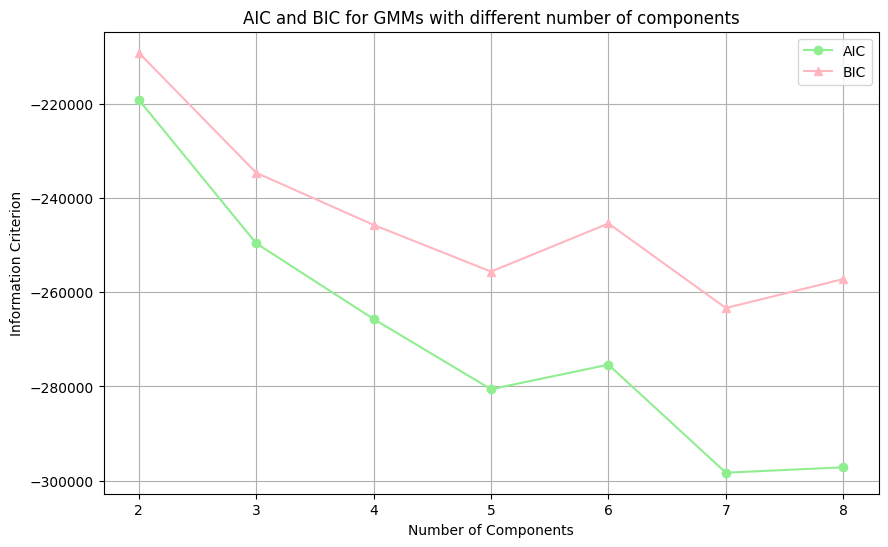

In [62]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Identify categorical columns
categorical_cols = data.select_dtypes(include=['object']).columns.tolist()

# Create a ColumnTransformer to one-hot encode categorical features and passthrough numerical ones
preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

# Fit and transform the data
md_encoded = preprocessor.fit_transform(data)

# Scale the encoded data
md_scaled = StandardScaler().fit_transform(md_encoded)

# Fit Gaussian Mixture Models from k = 2 to 8
n_components_range = range(2, 9)
models = {}
aic_values = []
bic_values = []

for n_components in n_components_range:
    gmm = GaussianMixture(n_components=n_components, random_state=1234)
    gmm.fit(md_scaled)

    aic_values.append(gmm.aic(md_scaled))
    bic_values.append(gmm.bic(md_scaled))
    models[n_components] = gmm

# Plot AIC and BIC values
plt.figure(figsize=(10, 6))
plt.plot(n_components_range, aic_values, marker='o', label='AIC' ,color='lightgreen')
plt.plot(n_components_range, bic_values, marker='^', label='BIC', color='lightpink')
plt.title('AIC and BIC for GMMs with different number of components')
plt.xlabel('Number of Components')
plt.ylabel('Information Criterion')
plt.legend()
plt.grid()
plt.show()

In [64]:
# Select the model with k=4
md_m4 = models[4]

# For demonstration here, I'll assume you are using k=5 from KMeans already fitted
from sklearn.cluster import KMeans

# Perform KMeans clustering
kmeans = KMeans(n_clusters=5, random_state=1234)
kmeans_labels = kmeans.fit_predict(md_scaled)

# Create a DataFrame to hold the cluster assignments
kmeans_df = pd.DataFrame({'KMeans_Cluster': kmeans_labels})

# Create a DataFrame with the GMM clusters
gmm_labels = md_m4.predict(md_scaled)
gmm_df = pd.DataFrame({'GMM_Cluster': gmm_labels})

# Combine the two DataFrames
combined_df = pd.concat([kmeans_df, gmm_df], axis=1)

# Generate a contingency table for KMeans vs GMM clusters
contingency_table = pd.crosstab(combined_df['KMeans_Cluster'], combined_df['GMM_Cluster'])
print(contingency_table)

# Get the log-likelihood for the GMM model
log_likelihood_m4 = md_m4.score(md_scaled)
print("Log-Likelihood for GMM with k=4:", log_likelihood_m4)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


GMM_Cluster       0   1    2    3
KMeans_Cluster                   
0                 2   4  108    0
1               128   7    2   28
2               400   8    6   75
3               191  25   14   72
4                 1   9  155  218
Log-Likelihood for GMM with k=4: 94.02697747687496


# Profiling the Segments

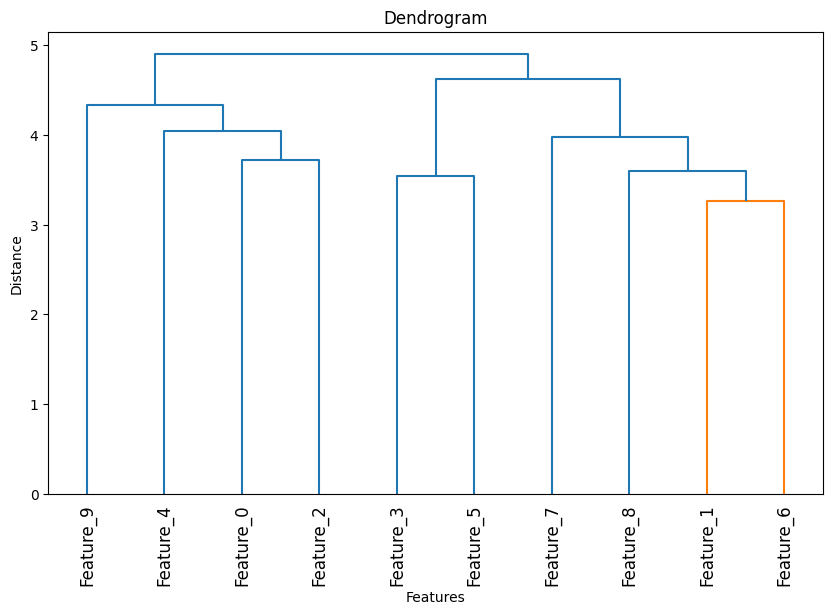

<ipython-input-67-62dde8726d9c>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')


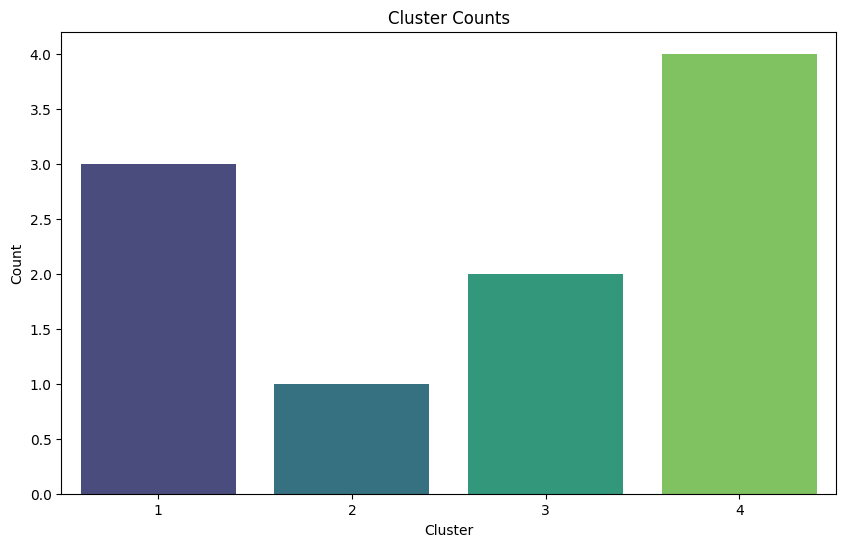

"\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x=MD_pca[:, 0], y=MD_pca[:, 1], hue=MD_k4, palette='viridis', s=100)\nplt.title('PCA Plot with Clusters')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.legend(title='Cluster')\nplt.show()\n\n# Step 6: Project Axes on PCA plot\nfor i in range(len(MD_x.columns)):\n    plt.arrow(0, 0, MD_pca[i, 0] * 0.1, MD_pca[i, 1] * 0.1,\n              color='gray', alpha=0.5,\n              head_width=0.1, head_length=0.1)\n\nplt.scatter(MD_pca[:, 0], MD_pca[:, 1], c=MD_k4, cmap='viridis')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.title('PCA Plot with Projected Axes')\nplt.grid()\nplt.show()\n"

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist
from sklearn.decomposition import PCA

# Step 1: Simulate some example data for MD.x
np.random.seed(0)  # For reproducibility
num_samples = 100
num_features = 10

# Create a random DataFrame (replace this with your actual data loading)
md_x = pd.DataFrame(np.random.rand(num_samples, num_features),
                    columns=[f'Feature_{i}' for i in range(num_features)])

# Step 2: Perform hierarchical clustering
md_x_transposed = md_x.T  # Transpose the data
dist_matrix = pdist(md_x_transposed)  # Calculate distance matrix
md_vclust = linkage(dist_matrix, method='ward')  # Perform hierarchical clustering

# Step 3: Create cluster assignments using a method, e.g., fcluster
from scipy.cluster.hierarchy import fcluster

# Create clusters (for example, using 4 clusters)
md_k4 = fcluster(md_vclust, t=4, criterion='maxclust')

# Plot dendrogram to visualize the hierarchical clustering
plt.figure(figsize=(10, 6))
dendrogram(md_vclust, labels=md_x.columns, leaf_rotation=90)
plt.title('Dendrogram')
plt.xlabel('Features')
plt.ylabel('Distance')
plt.show()

# Step 4: Create a bar chart of cluster sizes
cluster_counts = pd.Series(md_k4).value_counts().sort_index()

# Plot bar chart of clusters
plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette='viridis')
plt.title('Cluster Counts')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

# Step 5: Project PCA and plot the results
pca = PCA(n_components=2)
md_pca = pca.fit_transform(md_x)  # Perform PCA

In [69]:
'''
plt.figure(figsize=(10, 6))
sns.scatterplot(x=md_pca[:, 0], y=md_pca[:, 1], hue=md_k4, palette='viridis', s=100)
plt.title('PCA Plot with Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Step 6: Project Axes on PCA plot
for i in range(len(md_x.columns)):
    plt.arrow(0, 0, md_pca[i, 0] * 0.1, md_pca[i, 1] * 0.1,
              color='gray', alpha=0.5,
              head_width=0.1, head_length=0.1)

plt.scatter(md_pca[:, 0], md_pca[:, 1], c=md_k4, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Plot with Projected Axes')
plt.grid()
plt.show()
'''

"\nplt.figure(figsize=(10, 6))\nsns.scatterplot(x=md_pca[:, 0], y=md_pca[:, 1], hue=md_k4, palette='viridis', s=100)\nplt.title('PCA Plot with Clusters')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.legend(title='Cluster')\nplt.show()\n\n# Step 6: Project Axes on PCA plot\nfor i in range(len(md_x.columns)):\n    plt.arrow(0, 0, md_pca[i, 0] * 0.1, md_pca[i, 1] * 0.1,\n              color='gray', alpha=0.5,\n              head_width=0.1, head_length=0.1)\n\nplt.scatter(md_pca[:, 0], md_pca[:, 1], c=md_k4, cmap='viridis')\nplt.xlabel('Principal Component 1')\nplt.ylabel('Principal Component 2')\nplt.title('PCA Plot with Projected Axes')\nplt.grid()\nplt.show()\n"

# Selecting Target Segment

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


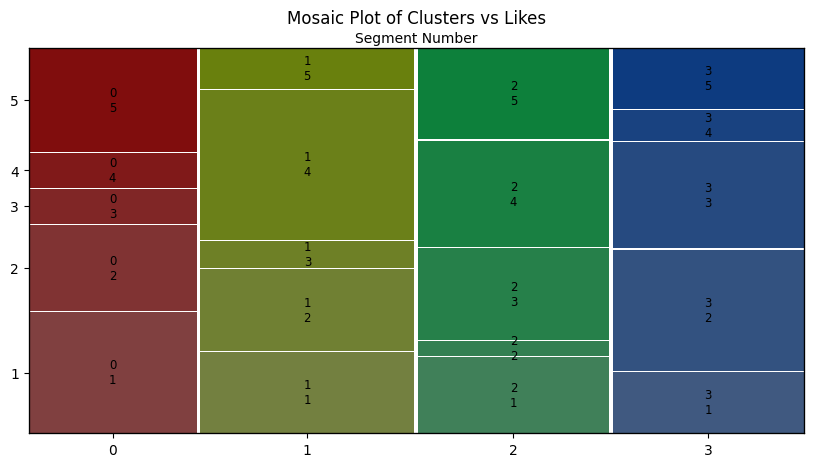

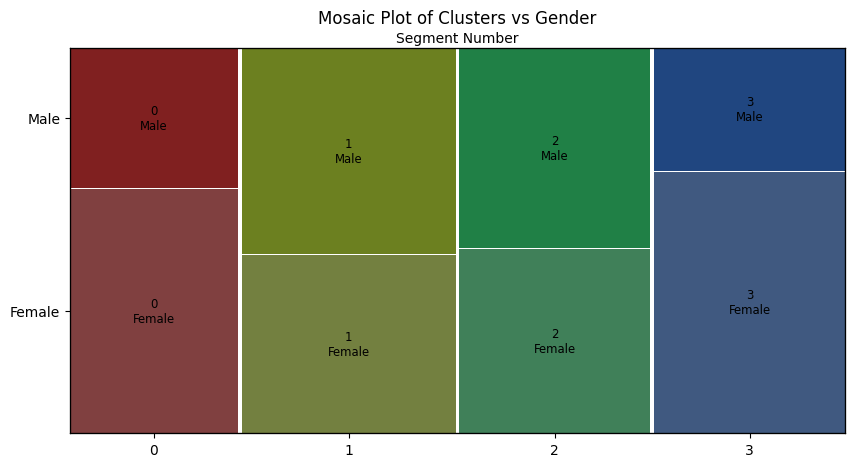

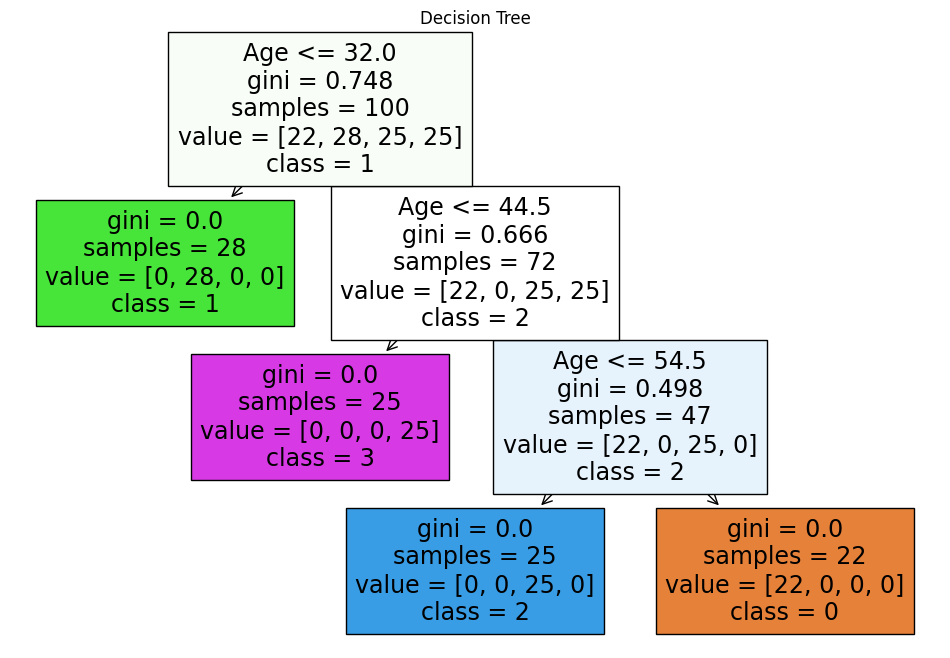

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from statsmodels.graphics.mosaicplot import mosaic

# Step 1: Simulate example data for `mcdonalds`
np.random.seed(0)
num_samples = 100

# Simulate a dataset similar to `mcdonalds`
mcdonald = pd.DataFrame({
    'Like': np.random.randint(1, 6, size=num_samples),
    'Gender': np.random.choice(['Female', 'Male'], size=num_samples),
    'Age': np.random.randint(18, 65, size=num_samples),
    'VisitFrequency': np.random.randint(1, 10, size=num_samples),
})

# Create the 'Like.n' column for derived variable
mcdonald['Like.n'] = 6 - mcdonald['Like']

# Step 2: Create clusters
kmeans = KMeans(n_clusters=4, random_state=0)
mcdonald['k4'] = kmeans.fit_predict(mcdonald[['Like.n', 'Age', 'VisitFrequency']])

# Step 3: Create contingency tables for mosaic plots
k4_crosstab_like = pd.crosstab(mcdonald['k4'], mcdonald['Like'])
k4_crosstab_gender = pd.crosstab(mcdonald['k4'], mcdonald['Gender'])

# Step 4: Mosaic plots
plt.figure(figsize=(10, 5))
mosaic(k4_crosstab_like.stack(), title='Mosaic Plot of Clusters vs Likes', ax=plt.gca())
plt.xlabel('Segment Number')
plt.ylabel('Like Count')
plt.show()

plt.figure(figsize=(10, 5))
mosaic(k4_crosstab_gender.stack(), title='Mosaic Plot of Clusters vs Gender', ax=plt.gca())
plt.xlabel('Segment Number')
plt.ylabel('Gender Count')
plt.show()

# Step 5: Prepare data for the decision tree
# Encode the categorical variables
label_encoder = LabelEncoder()
mcdonald['Gender_encoded'] = label_encoder.fit_transform(mcdonald['Gender'])

# Decision Tree Model
tree = DecisionTreeClassifier()
tree.fit(mcdonald[['Like.n', 'Age', 'VisitFrequency', 'Gender_encoded']], mcdonald['k4'])

# Tree plotting
plt.figure(figsize=(12, 8))
plot_tree(tree, feature_names=['Like.n', 'Age', 'VisitFrequency', 'Gender_encoded'], class_names=['0', '1', '2', '3'], filled=True)
plt.title('Decision Tree')
plt.show()

# Step 6: Calculate visitation and likes means
visit = mcdonald.groupby('k4')['VisitFrequency'].mean()
like = mcdonald.groupby('k4')['Like.n'].mean()
female = mcdonald.groupby('k4')['Gender'].apply(lambda x: (x == 'Female').mean())

